In [148]:
import os
import re
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

% matplotlib inline

In [155]:
# read in all relevant files
data_path = "../logs/"
problem = "cm"
date = "07_14"

problems = {"cm":"Copy Memory Problem", "ap": "Adding Problem", "mnist":"MNIST Image Problem"}

In [128]:
# create regex to filter for just the folders we want
regex = re.compile(r'..\/logs\/{}\/.*\/07_14.*\/.*logs'.format(problem))

In [129]:
# filter just folders we want
n = []
for root, dirs, files in os.walk(os.path.join(data_path,problem), topdown=True):
    for name in dirs:
        n.append(os.path.join(root,name))
        
n = list(filter(regex.search,n))

In [130]:
def parse_name(name):
    name = name[name.find(problem) + len(problem) + 1:]
    
    name = name[:name.find("/logs")]
    
    return name.replace("/","_")

In [138]:
# parse folder into data frame
def parse_folder(name):
    # creates data frame (dictionary?) with a variety of attributes
    loss = np.genfromtxt(os.path.join(name,"losses.txt"), 
                  delimiter="\n",names=["loss"], autostrip=True)

    loss = [i[0] for i in loss]
    
    with open(os.path.join(name,"info.txt")) as file:
        data = json.load(file)
        
    data["loss"] = loss
    
    # get average of five lowest values
    data["mean_loss"] = np.mean(np.sort(loss)[:5])
    
    return data, parse_name(name)

In [139]:
# loop through all things in string of interest
results = {}
for name in n:
    data, trial_name = parse_folder(name)
    results[trial_name] = data

<Figure size 432x288 with 0 Axes>

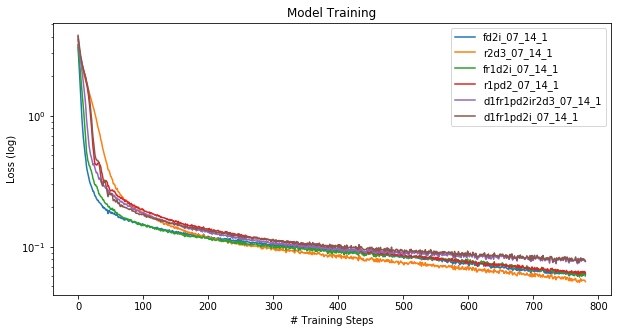

In [144]:
# plot all results
plt.clf()
fig = plt.figure(figsize=(10,5))
for key, val in results.items():
    plt.semilogy(val["loss"], label=key)

plt.legend()
plt.ylabel("Loss (log)")
plt.xlabel("# Training Steps")
plt.title("Model Training")
plt.show()

<Figure size 432x288 with 0 Axes>

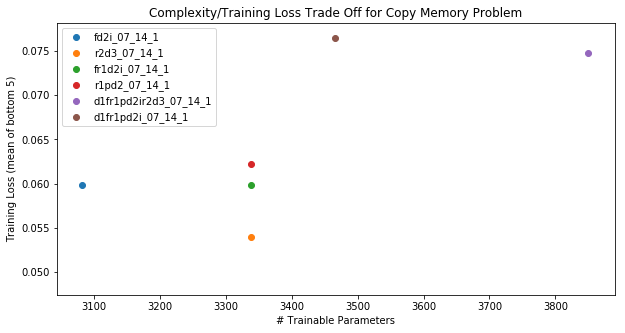

In [157]:
plt.clf()
fig = plt.figure(figsize=(10,5))

for key, val in results.items():
    plt.scatter(val["trainable_params"],val["mean_loss"], label=key)
   

plt.title("Complexity/Training Loss Trade Off for {}".format(problems[problem]))
plt.ylabel("Training Loss (mean of bottom 5)")
plt.xlabel("# Trainable Parameters")
plt.legend()
plt.show()

In [146]:
results

{'d1fr1pd2i_07_14_1': {'batch_size': 128,
  'cell_type': 'flexi_cell',
  'decay': 0.9,
  'directory': './logs/cm/d1fr1pd2i/07_14/1/logs',
  'end_time': '18:53:59',
  'epochs': 1,
  'learning_rate': 0.001,
  'loss': [4.1125102043151855,
   3.7287771701812744,
   3.411850929260254,
   3.1258676052093506,
   2.8745696544647217,
   2.720881700515747,
   2.527303457260132,
   2.3985440731048584,
   2.279681921005249,
   2.1841278076171875,
   2.1004111766815186,
   2.027216911315918,
   1.9470348358154297,
   1.8371411561965942,
   1.7615959644317627,
   1.6617528200149536,
   1.5581222772598267,
   1.432713270187378,
   1.3060005903244019,
   1.1617673635482788,
   1.0500763654708862,
   0.9197073578834534,
   0.776225745677948,
   0.682963490486145,
   0.6215618252754211,
   0.5533006191253662,
   0.5021538138389587,
   0.4786638021469116,
   0.46209394931793213,
   0.4577179551124573,
   0.4577234983444214,
   0.4483671188354492,
   0.43671780824661255,
   0.4087598919868469,
   0.373982

In [122]:
d, name = parse_folder(n[3])